In [5]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Download Apple stock data
ticker = "AAPL"
data = yf.download(ticker, start="2017-01-01", end="2023-12-31")

# Show first few rows
data.head()


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2017-01-03,26.770880,26.812367,26.450505,26.690210,115127600
2017-01-04,26.740917,26.853856,26.678687,26.701735,84472400
2017-01-05,26.876905,26.934527,26.692516,26.717870,88774400
2017-01-06,27.176533,27.234154,26.844633,26.916083,127007600
2017-01-09,27.425463,27.526877,27.183454,27.185758,134247600


In [6]:
data.to_csv("../data/raw/APPL.csv")
print("data saved sucessfully")

data saved sucessfully


In [7]:
#Feature Extraction

In [21]:
import pandas as pd

# Read CSV with correct headers
data = pd.read_csv(
    "../data/raw/APPL.csv",
    header=[0, 1],
    index_col=0
)

# Remove ticker level (AAPL)
data.columns = data.columns.droplevel(1)

# Convert index to datetime
data.index = pd.to_datetime(data.index)

# Ensure numeric data
data = data.apply(pd.to_numeric)

data.head()


Price,Close,High,Low,Open,Volume
Date,,,,,
2017-01-03,26.770880,26.812367,26.450505,26.690210,115127600
2017-01-04,26.740917,26.853856,26.678687,26.701735,84472400
2017-01-05,26.876905,26.934527,26.692516,26.717870,88774400
2017-01-06,27.176533,27.234154,26.844633,26.916083,127007600
2017-01-09,27.425463,27.526877,27.183454,27.185758,134247600


In [ ]:
#moving average
data['MA7'] = data['Close'].rolling(window=7).mean()
data['MA21'] = data['Close'].rolling(window=21).mean()

data[['Close', 'MA7', 'MA21']].tail()


Price,Close,MA7,MA21
Date,,,
2023-12-22,191.788757,194.112527,191.682147
2023-12-26,191.243912,193.396432,191.827441
2023-12-27,191.342957,192.770909,191.985944
2023-12-28,191.768951,192.443998,192.135956
2023-12-29,190.728760,191.819890,192.285024


In [23]:
data.to_csv("../data/processed/APPL_with_MA.csv")
print("Moving averages saved successfully")


Moving averages saved successfully


In [24]:
import numpy as np

def compute_rsi(close, period=14):
    delta = close.diff()
    gain = delta.clip(lower=0)
    loss = -delta.clip(upper=0)

    avg_gain = gain.rolling(window=period).mean()
    avg_loss = loss.rolling(window=period).mean()

    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

data['RSI14'] = compute_rsi(data['Close'], 14)

data[['Close', 'RSI14']].tail()


Price,Close,RSI14
Date,,
2023-12-22,191.788757,59.246155
2023-12-26,191.243912,49.031940
2023-12-27,191.342957,52.291466
2023-12-28,191.768951,47.920380
2023-12-29,190.728760,40.185214


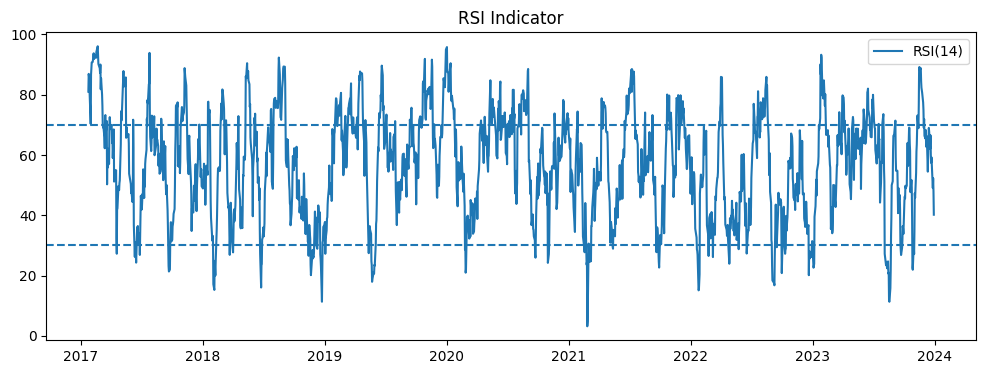

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))
plt.plot(data['RSI14'], label='RSI(14)')
plt.axhline(70, linestyle='--')
plt.axhline(30, linestyle='--')
plt.title('RSI Indicator')
plt.legend()
plt.show()


In [26]:
data.to_csv("../data/processed/APPL_with_MA_RSI.csv")
print("MA + RSI saved successfully")


MA + RSI saved successfully


In [27]:
# MACD calculation

exp12 = data['Close'].ewm(span=12, adjust=False).mean()
exp26 = data['Close'].ewm(span=26, adjust=False).mean()

data['MACD'] = exp12 - exp26
data['MACD_signal'] = data['MACD'].ewm(span=9, adjust=False).mean()

data[['MACD', 'MACD_signal']].tail()


Price,MACD,MACD_signal
Date,,
2023-12-22,2.633140,3.235255
2023-12-26,2.304751,3.049154
2023-12-27,2.029102,2.845144
2023-12-28,1.823996,2.640914
2023-12-29,1.559536,2.424639


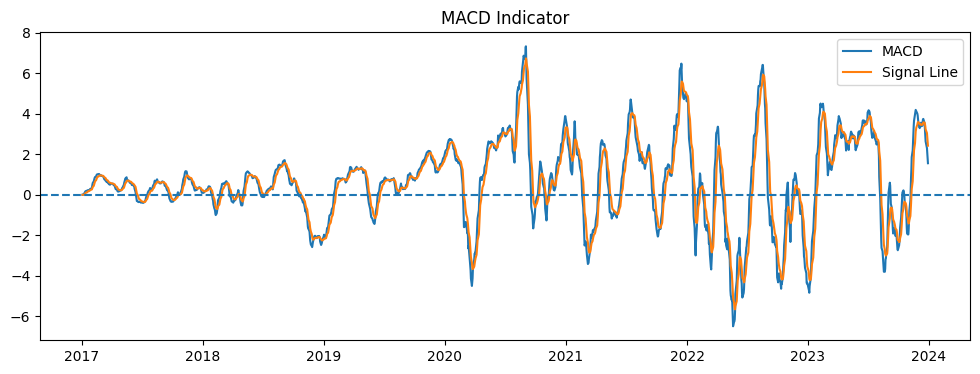

In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))
plt.plot(data['MACD'], label='MACD')
plt.plot(data['MACD_signal'], label='Signal Line')
plt.axhline(0, linestyle='--')
plt.title('MACD Indicator')
plt.legend()
plt.show()


In [29]:
data.to_csv("../data/processed/APPL_with_MA_RSI_MACD.csv")
print("Final feature dataset saved successfully")


Final feature dataset saved successfully


In [30]:
#Load the final features dataset

In [31]:
import pandas as pd

data = pd.read_csv(
    "../data/processed/APPL_with_MA_RSI_MACD.csv",
    index_col=0,
    parse_dates=True
)

data.head()

,Close,High,Low,Open,Volume,MA7,MA21,RSI14,MACD,MACD_signal
Date,,,,,,,,,,
2017-01-03,26.770880,26.812367,26.450505,26.690210,115127600,NaN,NaN,NaN,0.000000,0.000000
2017-01-04,26.740917,26.853856,26.678687,26.701735,84472400,NaN,NaN,NaN,-0.002390,-0.000478
2017-01-05,26.876905,26.934527,26.692516,26.717870,88774400,NaN,NaN,NaN,0.006612,0.000940
2017-01-06,27.176533,27.234154,26.844633,26.916083,127007600,NaN,NaN,NaN,0.037492,0.008251
2017-01-09,27.425463,27.526877,27.183454,27.185758,134247600,NaN,NaN,NaN,0.081116,0.022824


RMSE value: 1.4322987966244305


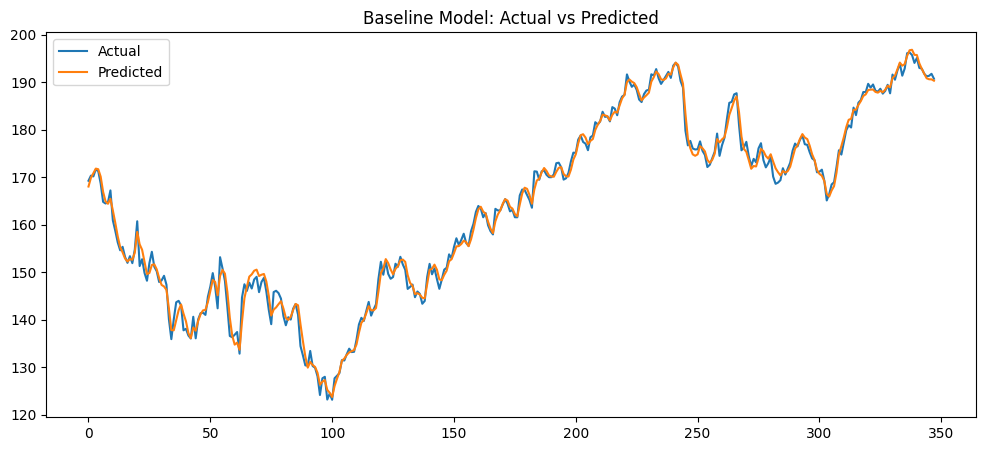

In [38]:
# Select features & target

# We’ll predict Close price (next day).
features = ['MA7', 'MA21', 'RSI14', 'MACD', 'MACD_signal']
target = 'Close'

# Drop rows with NaN (from rolling indicators)
data_ml = data[features + [target]].dropna()

X = data_ml[features]
y = data_ml[target]

#Train–test split (time-series safe)
split = int(len(data_ml) * 0.8)

X_train, X_test = X.iloc[:split], X.iloc[split:]
y_train, y_test = y.iloc[:split], y.iloc[split:]

#Train baseline model (Linear Regression)

from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

#Evaluate (RMSE)
from sklearn.metrics import mean_squared_error
import numpy as np

y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("RMSE value:", rmse)


# Plot Actual vs Predicted

import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.title('Baseline Model: Actual vs Predicted')
plt.show()
